In [157]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV




%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join( 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from nb_modules import model as mod

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
building_df = pd.read_pickle('data/pickles/building_df.pkl')

In [121]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 0 to 762105
Data columns (total 55 columns):
building_id                               762106 non-null int64
district_id                               762106 non-null int64
vdcmun_id                                 762106 non-null int64
ward_id                                   762106 non-null int64
count_floors_pre_eq                       762106 non-null int64
age_building                              762106 non-null int64
plinth_area_sq_ft                         762106 non-null int64
height_ft_pre_eq                          762106 non-null int64
land_surface_condition                    762106 non-null object
foundation_type                           762106 non-null object
roof_type                                 762106 non-null object
ground_floor_type                         762106 non-null object
other_floor_type                          762106 non-null object
position                                  762106 non

In [91]:
building_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'land_surface_condition_num', 'foundation_type_num', 'roof_type_num',
       'ground_floor_type_num', 'other_floor_type_num', 'position_num',
       'plan_configuration_num', 'target', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
  

3    60.31
1    21.79
2    17.90
Name: target, dtype: float64


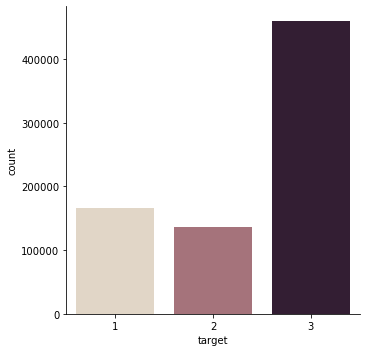

In [92]:
print(round(building_df['target'].value_counts(normalize=True)*100,2))
sns.catplot(x="target", kind="count", palette="ch:.25", data=building_df);

There is some level of class imbalance. 60% of the buildings in the dataset have severe or Grade 3 damage, while about 22% are buildings of Grade 1 with minor damages and 18% of buildings are of Grade 2 or major damages.

## Feature Engineering

We have a lot of nominal variables that may best be turned to dummies. The corresponding *'num'* features will be added to the drop list to be removed from the main dataset to be used in modeling

In [122]:
dummy_1 = mod.dummify(building_df, 'ward_id')
dummy_2 = mod.dummify(building_df, 'land_surface_condition')
dummy_3 = mod.dummify(building_df, 'foundation_type')
dummy_4 = mod.dummify(building_df, 'roof_type')
dummy_5 = mod.dummify(building_df, 'ground_floor_type')
dummy_6 = mod.dummify(building_df, 'other_floor_type')
dummy_7 = mod.dummify(building_df, 'position')
dummy_8 = mod.dummify(building_df, 'plan_configuration')
dummy_9 = mod.dummify(building_df, 'legal_ownership_status')

Next, we drop all the dummified features, 

In [123]:
drop_list= ['ward_id', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status', 'land_surface_condition_num', 
            'foundation_type_num', 'roof_type_num',
       'ground_floor_type_num', 'other_floor_type_num', 'position_num', 
            'plan_configuration_num', 'legal_ownership_status_num', 
            'has_secondary_use', 'has_geotechnical_risk']

In [124]:
building_df.drop(columns= drop_list, inplace=True)

In [125]:
df_list= [building_df, dummy_1 , dummy_2 , dummy_3 , dummy_4 , dummy_5 , dummy_6 , dummy_7 , dummy_8 , dummy_9]
for df in df_list:
    print(df.shape)


(762106, 36)
(762106, 18)
(762106, 2)
(762106, 4)
(762106, 2)
(762106, 4)
(762106, 3)
(762106, 3)
(762106, 9)
(762106, 3)


In [126]:
X = pd.concat(df_list, axis=1)

In [127]:
y = X['target']
X.drop(['target'], axis=1, inplace=True)

In [128]:
print(X.shape)
print(y.shape)

(762106, 83)
(762106,)


### Polynomial Features

## Train Test Split - dataset after polynomial features

## Feature Selection using PCA

**PCA Step-by-step**
* It is important to center and standardize your data. PCA lives off of correlation and covariance of your data, and using wildly different scales could lead to inflated weights for the linear combination. Let's call this centered and standardized matrix Z.
* Calculate a covariance matrix of p x p where p responds to number of predictors.
* Calculate the eigenvectors and eigenvalues of the covariance matrix.
* Arrange the eigenvalues from largest to smallest. You should obtain p eigenvalues which correspond to number of components.
* Choose the amount of components you want to include based on number of variance explained.

## Class Imbalance
Going forward to tackle the class imbalance problem in the data, we will use a class weight dictionary to defince the class weight to be used in the models

In [130]:
round(y.value_counts(normalize=True)*100,2)

3    60.31
1    21.79
2    17.90
Name: target, dtype: float64

In [131]:
cw= {3: 20, 1: 35, 2: 45}

In [132]:
#concatenate our training data back together
training = pd.concat([X_train, y_train], axis=1)

In [133]:
# Separating the classes
grade1 = training[training['target']==1]
grade2 = training[training['target']==2]
grade3 = training[training['target']==3]
training['target'].value_counts()

3    276058
1     99485
2     81720
Name: target, dtype: int64

In [134]:
from sklearn.utils import resample

In [135]:
downsampled_grade3 = resample(grade3,
                      replace=False,
                      n_samples = len(grade1)+30000,
                      random_state = 100)

In [136]:
downsampled_grade3.shape

(129485, 84)

In [137]:
downsampled = pd.concat([downsampled_grade3, grade1, grade2])

In [138]:
round(downsampled['target'].value_counts(normalize=True)*100,2)

3    41.68
1    32.02
2    26.30
Name: target, dtype: float64

In [139]:
y_train_dn = downsampled['target']
X_train_dn = downsampled.drop(columns = ['target'], axis= 1)
X_train_dn.shape

(310690, 83)

## Standardizing train and test

In [140]:
columns = X_train_dn.columns
scaler = MinMaxScaler()  
scaler.fit(X_train_dn)

X_train_scaled_values = scaler.transform(X_train_dn.values)  
X_test_scaled_values = scaler.transform(X_test.values)

X_train_scaled = X_train_dn.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns]= X_train_scaled_values
X_test_scaled[columns] = X_test_scaled_values